## Pratik Kadam 
#### TSF-GRIP Data Science & Business Analytics

#### Task5 :Exploratory Data Analysis - Sports

Dataset : https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view

### Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset 1 :

In [2]:
df_matches = pd.read_csv(r"D:\Spark Foundation Internship\Task5 (Sports)\matches.csv")
df_matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [3]:
df_matches.shape

(756, 18)

In [4]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Loading Dataset 2 :

In [5]:
df_deliveries = pd.read_csv(r"D:\Spark Foundation Internship\Task5 (Sports)\deliveries.csv")
df_deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
df_deliveries.shape

(179078, 21)

In [7]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### Total Teams :

In [8]:
df_matches.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [9]:
df_matches.team2.value_counts()

Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

* There are total **15 Teams**

### Number of Matches won by Teams 

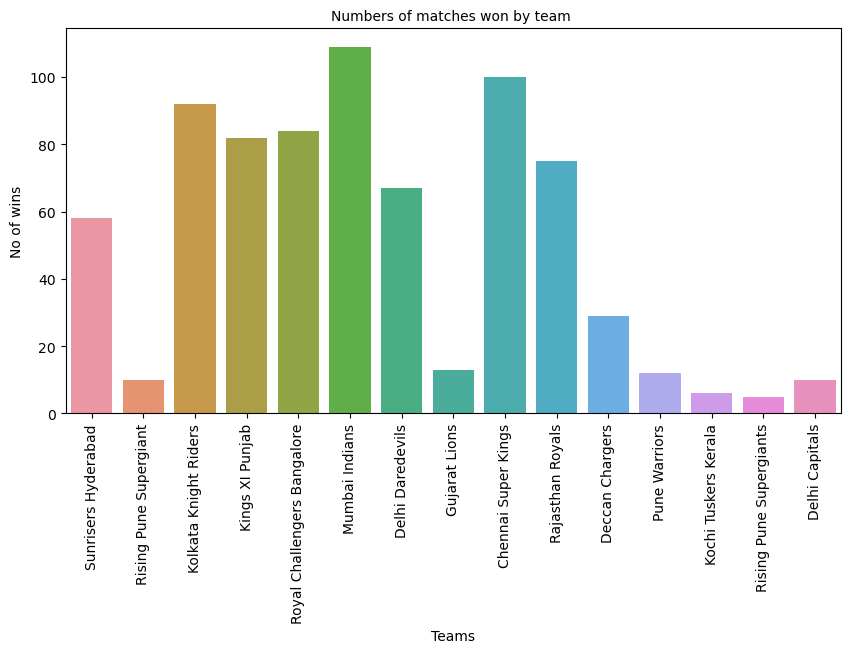

In [10]:
plt.figure(figsize = (10,5))

sns.countplot(x='winner',data=df_matches)
plt.title("Numbers of matches won by team ",fontsize=10)
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("No of wins")
plt.show()

* **Mumbai Indias** Has Won most matches  

### Total  Matches played in each IPL season

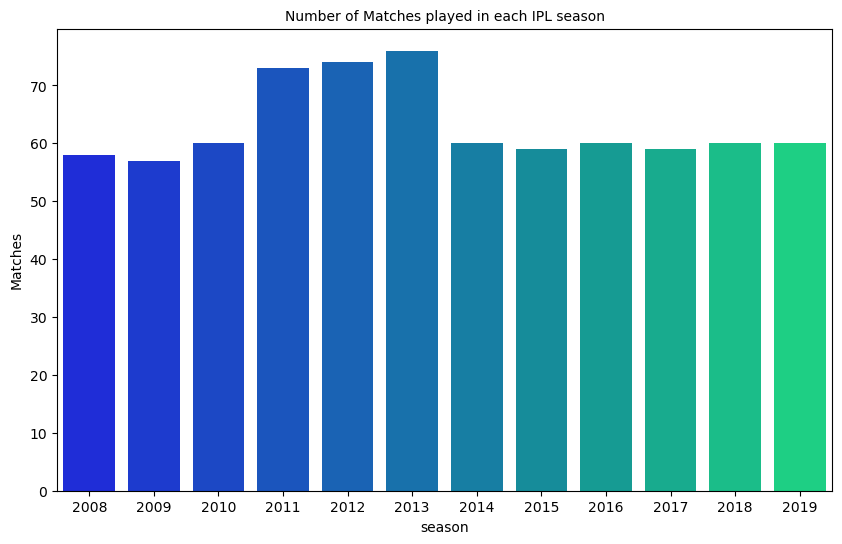

In [11]:
plt.figure(figsize = (10,6))
sns.countplot('season',data=df_matches,palette="winter")
plt.title("Number of Matches played in each IPL season",fontsize=10)
plt.xlabel("season")
plt.ylabel('Matches')
plt.show()

* In **2011, 2012, 2013** in this 3 Seasons more matches played other than all other seasons

### Numbers of matches won by team

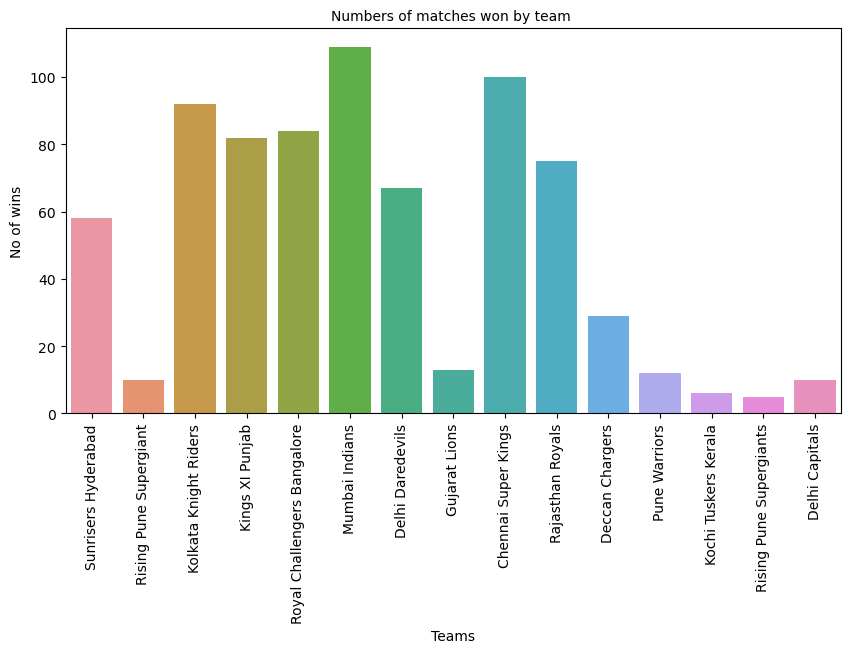

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(x='winner',data=df_matches)
plt.title("Numbers of matches won by team ",fontsize=10)
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("No of wins")
plt.show()

* **Mumbai Indians** Has won the most Matches

### Season Wise Winner 

In [13]:
matches = df_matches.drop_duplicates(subset=['season'], keep='last')
winner_of_season = matches[['season','winner']].reset_index(drop=True).sort_values('season')
winner_of_season

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


#### Number of Seasons won By Teams :

In [14]:
winner_of_season["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

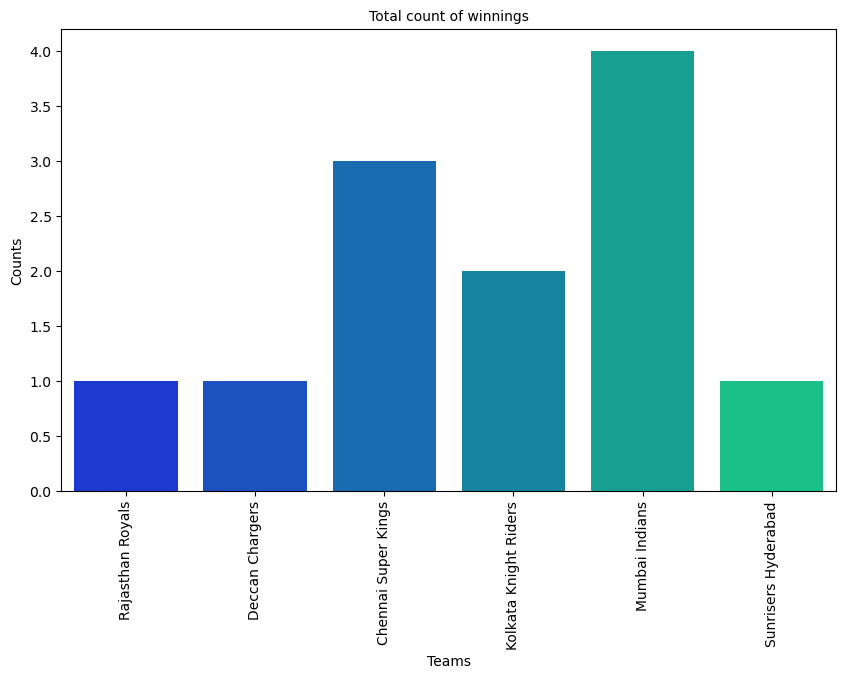

In [15]:
plt.figure(figsize = (10,6))
sns.countplot('winner',data=winner_of_season,palette="winter")
plt.title("Total count of winnings",fontsize=10)
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.show()

* **Mumbai indians** Has won Higgest Title of IPL [4 Titles]

### Toss Decision

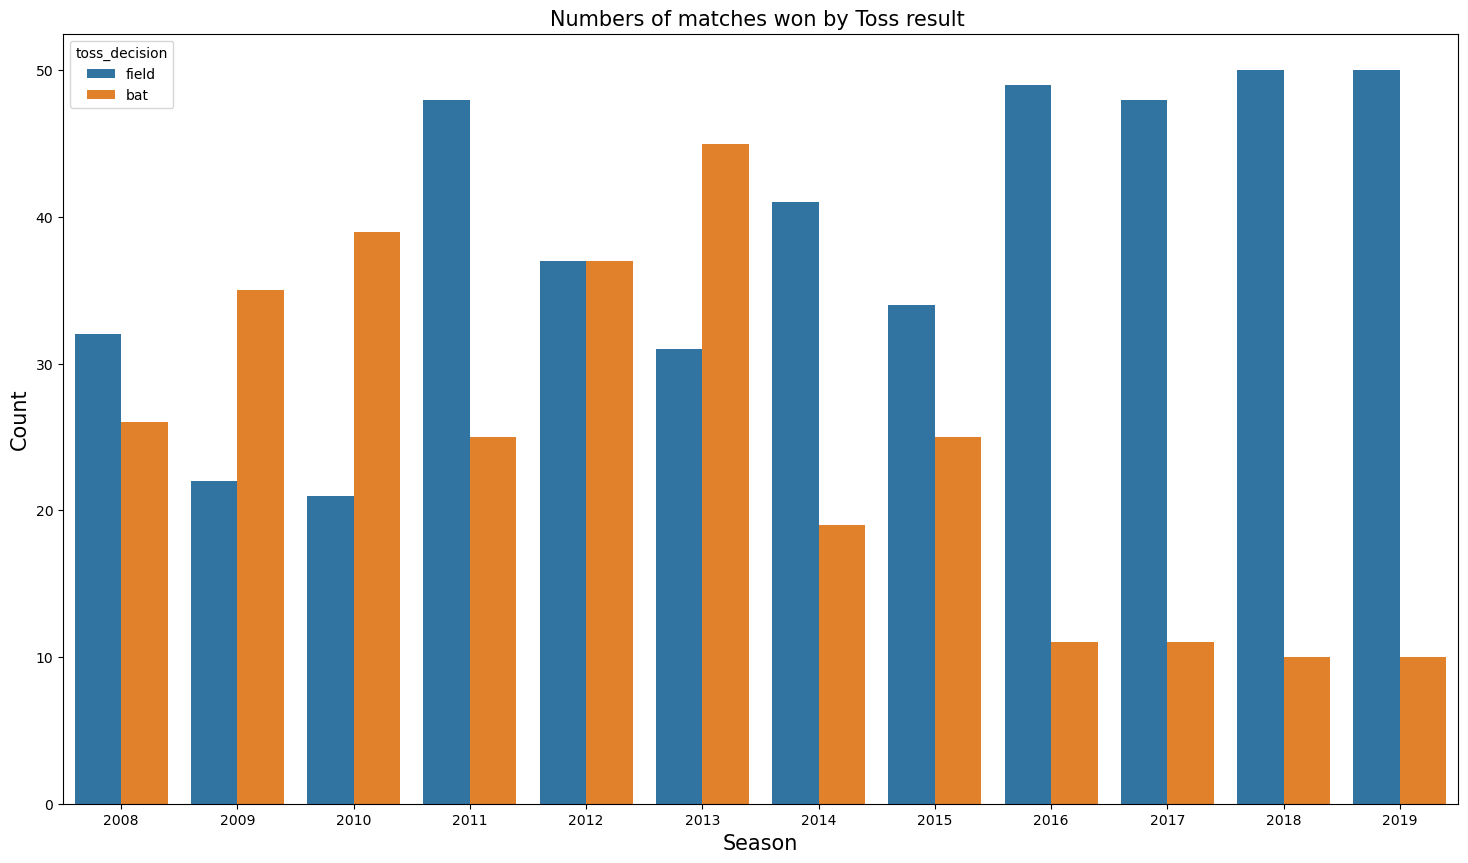

In [16]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=df_matches)
plt.title("Numbers of matches won by Toss result ",fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

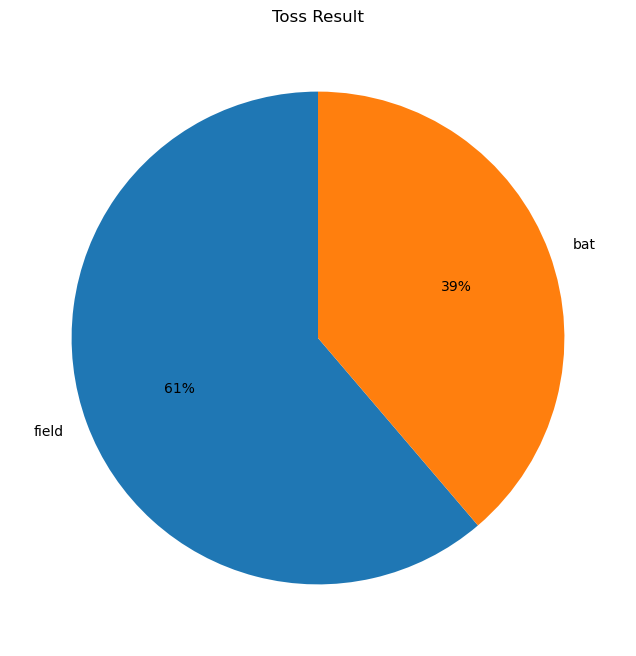

In [17]:
Toss = df_matches.toss_decision.value_counts()

labels = np.array(Toss.index)
plt.figure(figsize = (10,8))
plt.pie(Toss.values, labels=labels,autopct='%1.f%%',startangle=90)
plt.title('Toss Result')
plt.show()

* After winning Toss Team Prefers to Field first

In [18]:
df_matches.toss_winner.value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

* Mumbai Indians has won Most Tosses

### Top players in IPL

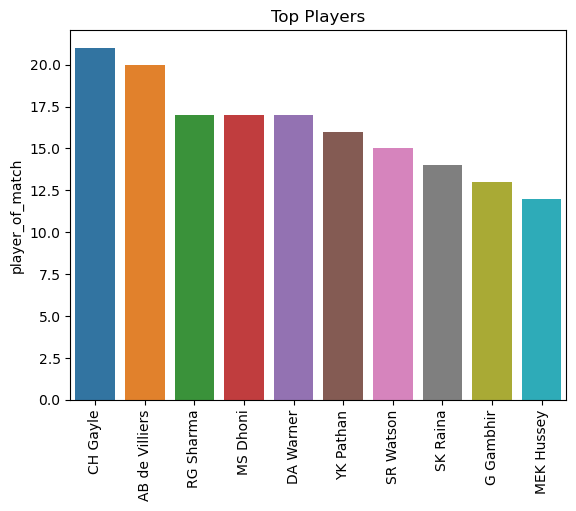

In [19]:
## Top 10 Players

top_players = df_matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_title("Top Players")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players);
plt.show()

* Among the all Player **CH Gayle** is on Top

### Toss winner, toss decision, winner in final matches :

In [20]:
matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


### Man of the match in Final :

In [21]:
matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


### Count of fours hit by team :

In [22]:
fours = df_deliveries[df_deliveries['batsman_runs']==4]
fours.groupby('batting_team')['batsman_runs'].agg([('fours','count')])

,fours
batting_team,
Chennai Super Kings,2193
Deccan Chargers,957
Delhi Capitals,242
Delhi Daredevils,2158
Gujarat Lions,460
Kings XI Punjab,2458
Kochi Tuskers Kerala,170
Kolkata Knight Riders,2434
Mumbai Indians,2588


* Mumbai Indians Hits most Fours : 2588

### Fours By individual Player :

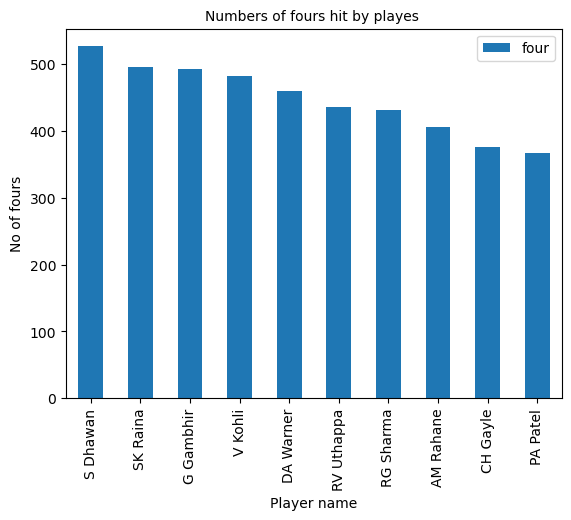

In [23]:
# Top 10 Players:

batsman_four = fours.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax = batsman_four.iloc[:10,:].plot('batsman','four',kind='bar')
plt.title("Numbers of fours hit by playes ",fontsize=10)
plt.xticks(rotation=90)
plt.xlabel("Player name")
plt.ylabel("No of fours")
plt.show()

* Shikhar Dhawan Hits most Fours

### Count of Sixes Hits By team :

In [24]:
sixes = df_deliveries[df_deliveries['batsman_runs']==6]
sixes.groupby('batting_team')['batsman_runs'].agg([('Sixes','count')])

,Sixes
batting_team,
Chennai Super Kings,973
Deccan Chargers,400
Delhi Capitals,87
Delhi Daredevils,801
Gujarat Lions,155
Kings XI Punjab,976
Kochi Tuskers Kerala,53
Kolkata Knight Riders,930
Mumbai Indians,1096


* Royal Challengers Bangalore Hits most Sixes : 1132

### Sixes by individual Player :

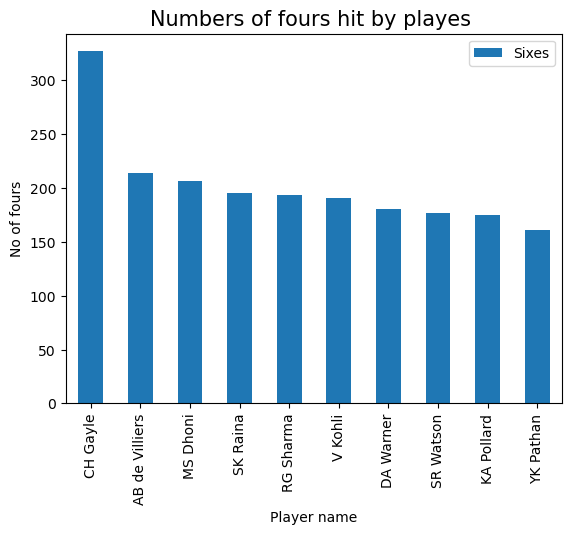

In [25]:
# Top 10 Players:

batsman_four = sixes.groupby('batsman')['batsman_runs'].agg([('Sixes','count')]).reset_index().sort_values('Sixes',ascending=0)
ax = batsman_four.iloc[:10,:].plot('batsman','Sixes',kind='bar')
plt.title("Numbers of fours hit by playes ",fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("Player name")
plt.ylabel("No of fours")
plt.show()

* Chirs Gayle Hits Most Sixes

### Top Run Scorer

In [26]:
score = df_deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
score=score.rename(columns={'sum':'batsman_runs'})
print("Top 3 Leading Run Scorer in IPL")
score.iloc[:3,:]


Top 3 Leading Run Scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914


* Top 3 Run Scorer

1) V Kohli	
2) SK Raina	
3) RG Sharma	

### Higgest Match Played

In [27]:
# we will print no of matches played by batsman
matches_played = df_deliveries[["match_id","player_dismissed"]]
matches_played =matches_played .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
matches_played.columns=["batsman","No_of Matches"]
matches_played .head(5)


,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


* Most matches Played Player

1) SK Raina

2) RG Sharma

3) RV Uthappa

### Dismissals in IPL :

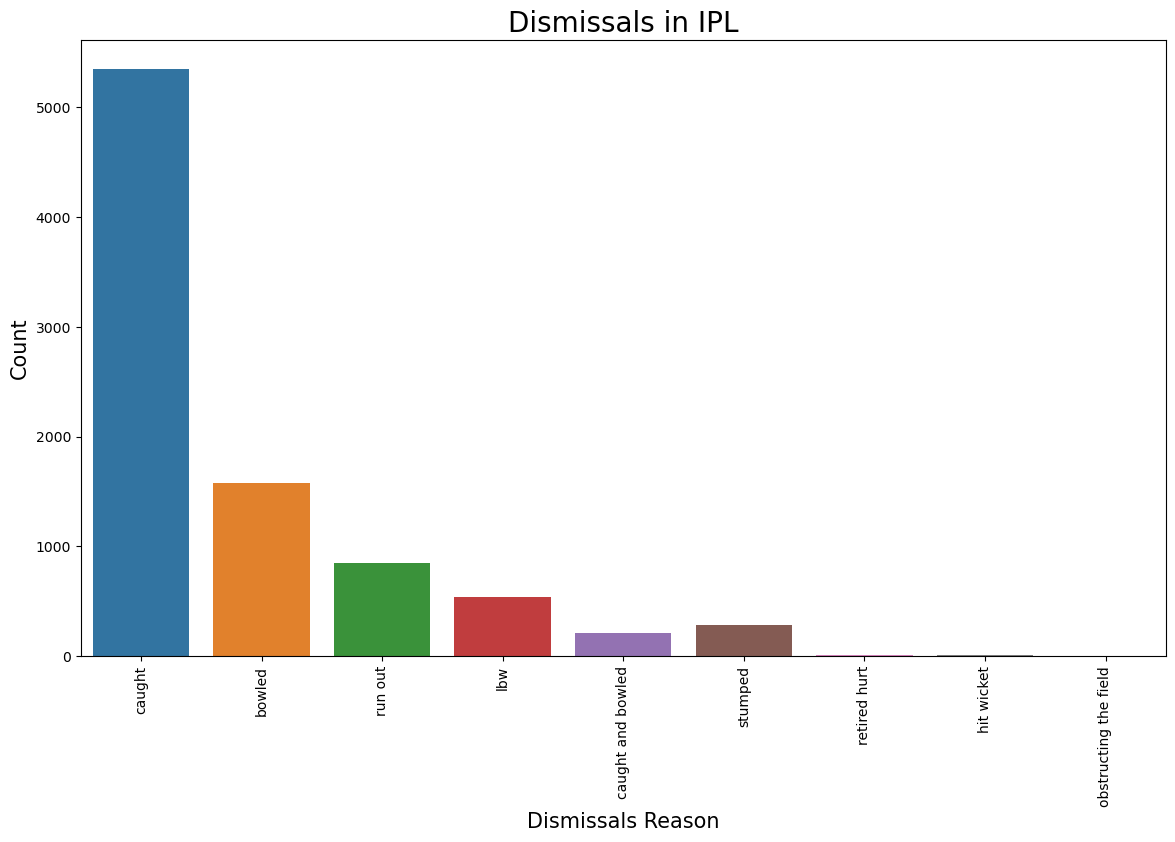

In [28]:
plt.figure(figsize=(14,8))

ax = sns.countplot(df_deliveries.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals Reason",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

* Higgest Dismissals by Caught

### Wicket taker bowler :

In [29]:
wickets = df_deliveries.dropna(subset=['dismissal_kind'])
wickets = wickets[~wickets['dismissal_kind'].isin(['run out','retired hurt','obstructing the fielld'])]

In [30]:
wickets.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


* SL Malinga is the Higgest wicket taker Bowler

## Conclusion :

* The highest number of match played in IPL season was **2013,2014,2015**.

* The highest number of match won by **Mumbai Indians** i.e 4 match out of 12 matches.

* After winning toss more teams decide to do field first.

* In finals most teams after winning toss decide to do fielding first.

* Top player of match winning are **CH gayle, AB de villers**.

* It is interesting that out of 12 IPL finals,9 times the team that won the toss They were Winner of the **IPL**

* Most Fours hits By **Mumbai Indians** team

* Most Fours hits By **Royal Challengers Bangalore** team

* The highest number of four hit by player is **Shikar Dhawan**.

* The highest number of six hit by player is **CH gayle**.

* Top leading run scorer in IPL are **Virat kholi, SK Raina, RG Sharma**.

* The highest number of matches played by player name are **SK Raina, RG Sharma**.

* Dismissals in IPL was most by Catch out .

* The most wicket taker blower is SL Malinga.

## End